Mi csv es sobre competidores de la ufc, los datos que tiene son la altura, el alcance, fecha de nacimiento, guardia, peso, link de su pagina de la ufc con las stats oficiales, nombre y apellido.
Conclusiones:
El grafico de las edades es util para saber en que edad los competidores de la ufc son mas, tambien sirve para determinar que tanto dura la carrera de un competidor, la cual iniciaria alrededor de los 25 y terminaria a los 50.
El grafico de torta sobre las guardias siver para dererminar cual es la guarda mas popular entre los competidores.
Con el grafico del peso podemos saber cual es la categoria en la que mas competidores hay, la cual seria la de menor peso.
Con la ayuda de todos estos datos podemos determinar cuales serian las estadisticas promedios de los competidores.

                 FIGHTER   HEIGHT   WEIGHT REACH    STANCE         DOB
3     ShamilAbdurakhimov   6ft3in  235lbs.  76in  Orthodox  02/09/1981
5              DaichiAbe  5ft11in  170lbs.  71in  Orthodox  27/11/1991
8           KlidsonAbreu   6ft0in  205lbs.  74in  Orthodox  24/12/1992
11             JuanAdams   6ft5in  265lbs.  80in  Orthodox  16/01/1992
12          AnthonyAdams   6ft1in  185lbs.  76in  Orthodox  13/01/1988
...                  ...      ...      ...   ...       ...         ...
3726           FaresZiam   6ft1in  155lbs.  75in  Orthodox  21/03/1997
3730          CatZingano   5ft6in  145lbs.  68in  Southpaw  01/07/1982
3735         AllanZuniga   5ft7in  155lbs.  70in  Orthodox  04/04/1992
3835       DanielArgueta   5ft7in  145lbs.  70in  Southpaw  13/08/1993
3867     GarrettArmfield   5ft6in  145lbs.  70in  Orthodox  09/10/1996

[1815 rows x 6 columns]


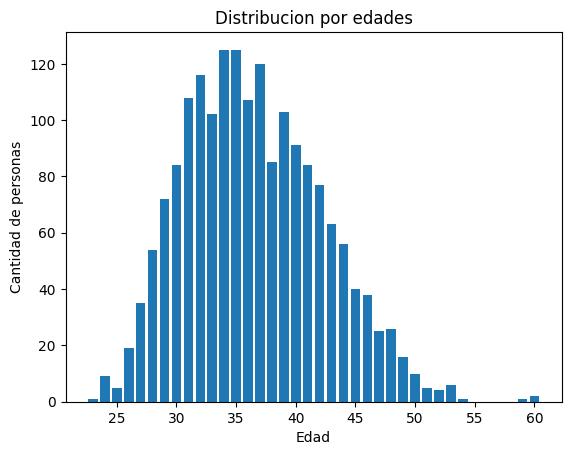

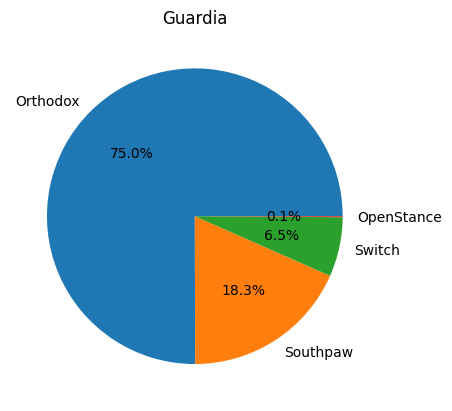

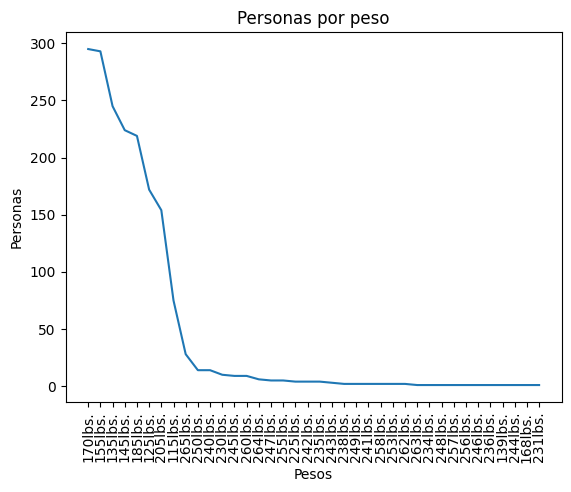

In [ ]:
import pandas as pd   #importamos la libreria pandas para poder leer el csv
import numpy as np
import datetime
import matplotlib.pyplot as plt

def cambiarMedidas(csv, columna):
  csv[columna] = csv[columna].apply(lambda x: x.replace('"', "in").replace("'", "ft"))
  return csv

def eliminarURL(csv):
  csv = csv.drop(columns=['URL'],axis=1)
  return csv

def reemplazarGuionesPorNaN(csv):
  csv.replace('--', np.nan, inplace=True)
  return csv

def eliminarFilasIncompletas(csv):
  csv = csv.dropna()
  return csv

def convertirFecha(csv):
  csv['DOB'] = pd.to_datetime(csv['DOB']).dt.strftime('%d/%m/%Y')
  return csv

def eliminarEspacios(csv):
  for column in csv.columns:
    csv[column] = csv[column].str.replace(' ', '')

  return csv

def calcularEdad(nacimiento):
  hoy = datetime.date.today()
  nacimiento = datetime.datetime.strptime(nacimiento, "%d/%m/%Y").date()
  edad = hoy.year - nacimiento.year
  if hoy.month < nacimiento.month or (hoy.month == nacimiento.month and hoy.day < nacimiento.day):
    edad -= 1
  return edad

def listaEdades(nacimientos):
  edades = []
  for nacimiento in nacimientos:
    edad = calcularEdad(nacimiento)
    edades.append(edad)

  return edades

def removerlbs(csv):
  csv['WEIGHT'] = csv['WEIGHT'].str.replace("lbs.", "")

  return csv

def cantidadPorCategoria(items): #funcion que cuenta cuantos hay por cada
  cantidadCategoria = {}
  for item in items:
    if item not in cantidadCategoria:
      cantidadCategoria[item] = 0
    cantidadCategoria[item] += 1

  return cantidadCategoria

csv = pd.read_csv("./ufc.csv")
altura = csv['HEIGHT']
csv = cambiarMedidas(csv,'HEIGHT')
csv = cambiarMedidas(csv,'REACH')
csv = eliminarURL(csv)
csv = reemplazarGuionesPorNaN(csv)
csv = eliminarFilasIncompletas(csv)
csv = convertirFecha(csv)
#csv = removerlbs(csv)
csv = eliminarEspacios(csv)
print(csv)
#csv.to_csv('ufc.csv')
edades=listaEdades(csv['DOB'])

grupoEdad = cantidadPorCategoria(edades)

plt.bar(grupoEdad.keys(), grupoEdad.values())
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")
plt.title("Distribucion por edades")
plt.show()

guardias = cantidadPorCategoria(csv['STANCE'])
plt.pie(guardias.values(), labels=guardias.keys(), autopct="%1.1f%%")
plt.title("Guardia")
plt.show()

cantidadPesos = csv["WEIGHT"].value_counts()#personas por peso
listaPesos = cantidadPesos.index.to_list()#lista pesos
cantidadPesonas = cantidadPesos.to_list()#lista de cantidad de personaas por peso

plt.plot(listaPesos, cantidadPesos)
plt.xlabel("Pesos")
plt.ylabel("Personas")
plt.title("Personas por peso")
plt.xticks(rotation=90)
plt.show()


